### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.preprocessing import LabelEncoder

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [92]:
data = pd.read_csv('data/coupons.csv')

In [93]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [94]:
# Deleting duplicated rows.
data.drop_duplicates(inplace=True)
print("Duplicate rows:\n", data.duplicated().sum(), "\n")

Duplicate rows:
 0 



In [95]:
# Checking if there are missing values in the dataframe.
print(data.isnull().sum())

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12502
Bar                       107
CoffeeHouse               217
CarryAway                 150
RestaurantLessThan20      129
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64


3. Decide what to do about your missing data -- drop, replace, other...

In [96]:
# Dropping car column
new_data = data.drop(columns=['car'])

#Fill missing value with mode
new_data['Bar'] = new_data['Bar'].fillna(new_data['Bar'].mode()[0])
new_data['CoffeeHouse'] = new_data['CoffeeHouse'].fillna(new_data['CoffeeHouse'].mode()[0])
new_data['CarryAway'] = new_data['CarryAway'].fillna(new_data['CarryAway'].mode()[0])
new_data['RestaurantLessThan20'] = new_data['RestaurantLessThan20'].fillna(new_data['RestaurantLessThan20'].mode()[0])
new_data['Restaurant20To50'] = new_data['Restaurant20To50'].fillna(new_data['Restaurant20To50'].mode()[0])

# Checking if there is still remaining missing values
print(new_data.isnull().sum())

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64


4. What proportion of the total observations chose to accept the coupon?



In [97]:
proportion_accepted = new_data['Y'].value_counts(normalize=True)[1]
print(f"Proportion of observations that accepted the coupon: {proportion_accepted:.2f}")

Proportion of observations that accepted the coupon: 0.57


5. Use a bar plot to visualize the `coupon` column.

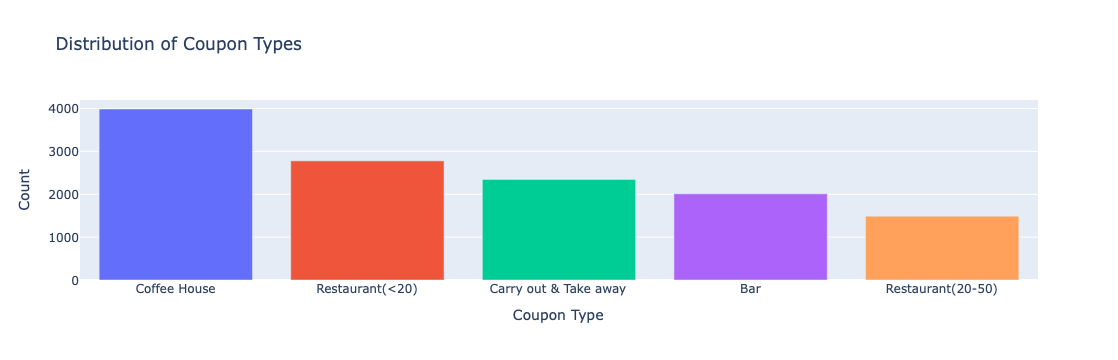

In [98]:
coupon_counts = new_data['coupon'].value_counts().reset_index()
coupon_counts.columns = ['Coupon Type', 'Count']

fig = px.bar(coupon_counts, x='Coupon Type', y='Count', color='Coupon Type',
             title='Distribution of Coupon Types')

fig.update_layout(
    xaxis_title='Coupon Type',
    yaxis_title='Count',
    width = 800,
    showlegend=False
)

fig.show()

6. Use a histogram to visualize the temperature column.

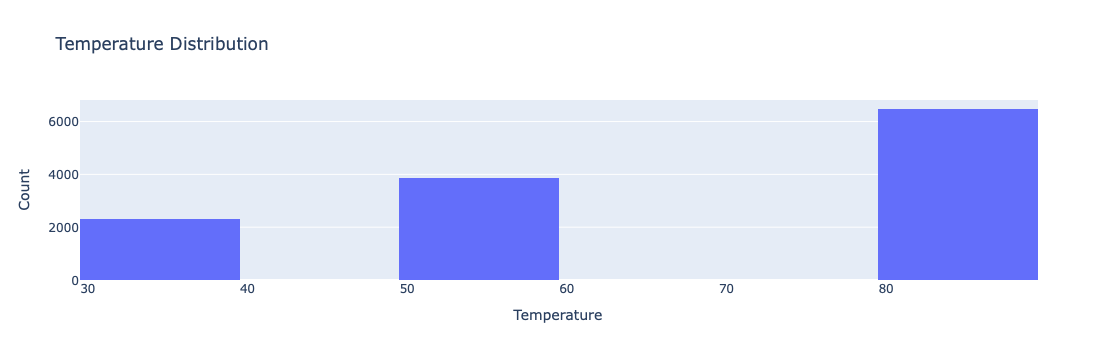

In [99]:
fig = px.histogram(new_data, x='temperature', nbins=10, title='Temperature Distribution')
fig.update_layout(
    xaxis_title='Temperature',
    yaxis_title='Count',
    width = 600
)
fig.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [100]:
bar_coupons = new_data[new_data['coupon'] == 'Bar']
bar_coupons = bar_coupons.reset_index(drop=True)
bar_coupons.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
1,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,1,0,1
2,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,1,0,1,0
3,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
4,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1


2. What proportion of bar coupons were accepted?


In [101]:
bar_coupons_accepted = len(bar_coupons[bar_coupons['Y'] == 1])
total = len(bar_coupons)
proportion_accepted = bar_coupons_accepted / total

print(f"Proportion of accepted bar coupons: {proportion_accepted:.2f}")

Proportion of accepted bar coupons: 0.41


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.

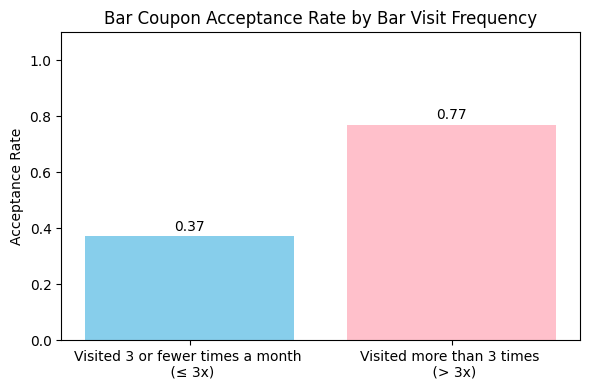

Acceptance rate for people who go to bars ≤ 3 times/month: 0.37
Acceptance rate for people who go to bars > 3 times/month: 0.77


In [102]:
less_than_3_times = bar_coupons[bar_coupons['Bar'].isin(['never', 'less1', '1~3'])]
more_than_3_times = bar_coupons[bar_coupons['Bar'].isin(['4~8', 'gt8'])]

less_than_three_accept_rate = less_than_3_times['Y'].mean()
more_than_three_accept_rate = more_than_3_times['Y'].mean()

groups = ['Visited 3 or fewer times a month \n (≤ 3x)', 'Visited more than 3 times \n (> 3x)']
accept_rates = [less_than_three_accept_rate, more_than_three_accept_rate]

# Plot
plt.figure(figsize=(6,4))
bars = plt.bar(groups, accept_rates, color=['skyblue', 'pink'])

for bar, rate in zip(bars, accept_rates):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{rate:.2}', ha='center', va='bottom')

plt.ylim(0, 1.1)
plt.ylabel('Acceptance Rate')
plt.title('Bar Coupon Acceptance Rate by Bar Visit Frequency')
plt.tight_layout()
plt.savefig("images/acceptance_rate_by_bar_visit_frequency_image.png", dpi=500, bbox_inches='tight')  # Save as PNG
plt.show()

# Print results
print(f"Acceptance rate for people who go to bars ≤ 3 times/month: {less_than_three_accept_rate:.2f}")
print(f"Acceptance rate for people who go to bars > 3 times/month: {more_than_three_accept_rate:.2f}")

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


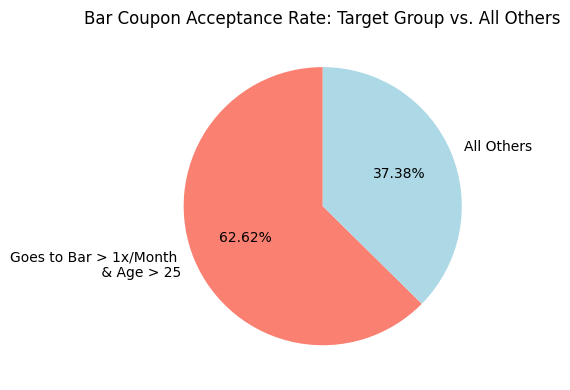

In [103]:
bar_coupons_filtered = bar_coupons.copy()
age_mapping = {'<21': 20, '21': 21, '22': 22, '26~30': 28, '31~35': 33, '36~40': 38, '41~45': 43, '46~50': 48, '50plus': 55}
bar_coupons_filtered['age_numeric'] = bar_coupons_filtered['age'].map(age_mapping)
bar_coupons_filtered['age_numeric'] = pd.to_numeric(bar_coupons_filtered['age_numeric'])

target_group = bar_coupons_filtered[
    (bar_coupons_filtered['Bar'].isin(['1~3', '4~8', 'gt8'])) &
    (bar_coupons_filtered['age_numeric'] > 25)
]

all_others_group = bar_coupons_filtered.drop(target_group.index)

target_accept_rate = target_group['Y'].mean()
others_accept_rate = all_others_group['Y'].mean()

groups = ['Goes to Bar > 1x/Month \n & Age > 25', 'All Others']
accept_rates = [target_accept_rate, others_accept_rate]

# Plot
plt.figure(figsize=(7, 4))
plt.pie(accept_rates, labels=groups, colors=['salmon', 'lightblue'], autopct='%.2f%%', startangle=90)

plt.title('Bar Coupon Acceptance Rate: Target Group vs. All Others')
plt.tight_layout()
plt.savefig("images/acceptance_rate_by_target_group_vs_all_others.png", dpi=500, bbox_inches='tight')  # Save as PNG
plt.show()

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


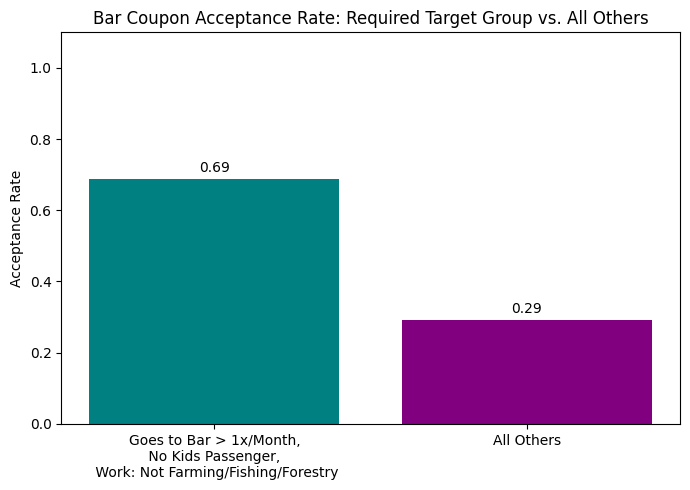

Acceptance rate for complex target group: 0.69
Acceptance rate for all others: 0.29


In [88]:
target_group_complex = bar_coupons[
    (bar_coupons['Bar'].isin(['1~3', '4~8', 'gt8'])) & 
    (~bar_coupons['passanger'].isin(['kid(s)'])) &  
    (~bar_coupons['occupation'].isin(['Farming Fishing & Forestry'])) 
]
all_others_group_complex = bar_coupons.drop(target_group_complex.index)

target_accept_rate_complex = target_group_complex['Y'].mean()
others_accept_rate_complex = all_others_group_complex['Y'].mean()

groups_complex = ['Goes to Bar > 1x/Month,\n No Kids Passenger, \n Work: Not Farming/Fishing/Forestry', 'All Others']
accept_rates_complex = [target_accept_rate_complex, others_accept_rate_complex]

# Plot
plt.figure(figsize=(7, 5))
bars_complex = plt.bar(groups_complex, accept_rates_complex, color=['teal', 'purple'])

for bar, rate in zip(bars_complex, accept_rates_complex):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01,
             f'{rate:.2f}', ha='center', va='bottom')

plt.ylim(0, 1.1)
plt.ylabel('Acceptance Rate')
plt.title('Bar Coupon Acceptance Rate: Required Target Group vs. All Others')
plt.tight_layout()
plt.savefig("images/acceptance_rate_by_required_target_group_vs_all_others.png", dpi=500, bbox_inches='tight')  # Save as PNG
plt.show()

# Print results
print(f"Acceptance rate for complex target group: {target_accept_rate_complex:.2f}")
print(f"Acceptance rate for all others: {others_accept_rate_complex:.2f}")

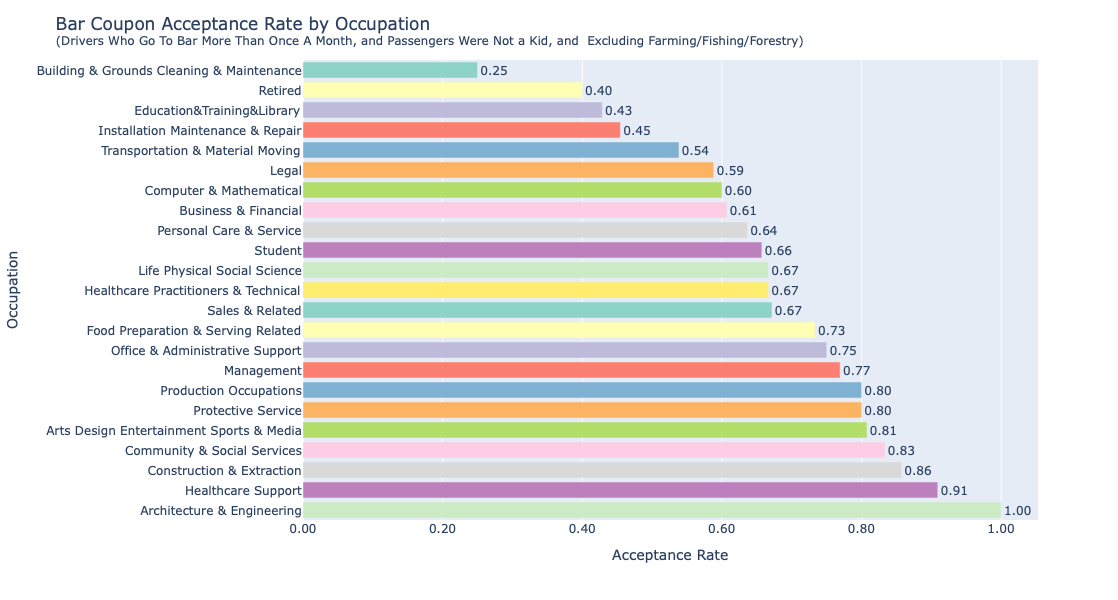

In [81]:
filtered_data = bar_coupons[
    (bar_coupons['Bar'].isin(['1~3', '4~8', 'gt8'])) &
    (~bar_coupons['passanger'].isin(['kid(s)'])) &
    (~bar_coupons['occupation'].isin(['Farming Fishing & Forestry', 'Unemployed']))
]
occupation_acceptance = filtered_data.groupby('occupation')['Y'].mean().reset_index()
occupation_acceptance = occupation_acceptance.sort_values(by='Y', ascending=True)

fig = px.bar(
    occupation_acceptance,
    y='occupation',
    x='Y',
    text=occupation_acceptance['Y'].apply(lambda x: f'{x:.2f}'),
    color='occupation',
    orientation='h',
    color_discrete_sequence=px.colors.qualitative.Set3
)

# Update layout
fig.update_layout(
    title='Bar Coupon Acceptance Rate by Occupation<br><sup>(Drivers Who Go To Bar More Than Once A Month, and Passengers Were Not a Kid, and  Excluding Farming/Fishing/Forestry)</sup>',
    xaxis_title='Acceptance Rate',
    yaxis_title='Occupation',
    xaxis=dict(tickformat=".2f"),
    showlegend=False,
    height=600,
    width=800
)
fig.update_traces(textposition='outside')

# Show plot
fig.show()

I also decided to explore which occupation has the highest acceptance rate for the bar coupon. I found that Architecture and Engineering has the highest acceptance rate, followed by Healthcare Support. Bar plot is above. 

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



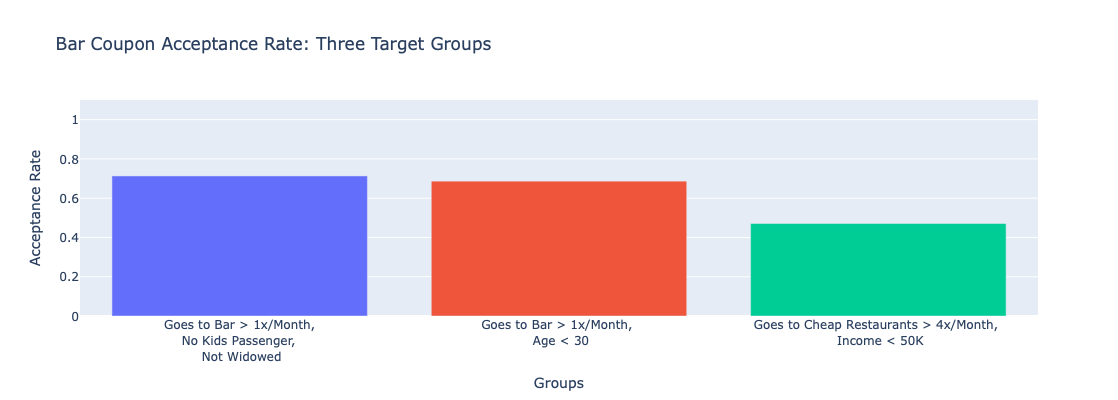

In [87]:
first_target = bar_coupons[
    (bar_coupons['Bar'].isin(['1~3', '4~8', 'gt8'])) &
    (~bar_coupons['passanger'].isin(['Kid(s)'])) &
    (~bar_coupons['maritalStatus'].isin(['Widowed']))
]
second_target = bar_coupons[
    (bar_coupons['Bar'].isin(['1~3', '4~8', 'gt8'])) &
    (bar_coupons['age'].isin(['21', '22', '26~30']))
]
third_target = bar_coupons[
    (bar_coupons['RestaurantLessThan20'].isin(['4~8', 'gt8'])) &
    (bar_coupons['income'].isin(['$25000 - $37499', '$37500 - $49999']))
]
first_target_accept_rate = first_target['Y'].mean()
second_target_accept_rate = second_target['Y'].mean()
third_target_accept_rate = third_target['Y'].mean()

plot_df = pd.DataFrame({
    'Group': ['Goes to Bar > 1x/Month,<br> No Kids Passenger, <br> Not Widowed',
              'Goes to Bar > 1x/Month, <br> Age < 30',
              'Goes to Cheap Restaurants > 4x/Month, <br> Income < 50K'],
    'Acceptance Rate': [first_target_accept_rate, second_target_accept_rate, third_target_accept_rate]
})

fig.write_image("images/acceptance_rate_by_three_target_groups_vs_all_others.png", width = 900, height = 700, scale = 1)  # Save as PNG
fig = px.bar(plot_df, x='Group', y='Acceptance Rate', color='Group',
             title='Bar Coupon Acceptance Rate: Three Target Groups')

fig.update_layout(yaxis_range=[0, 1.1])  # Set y-axis limit
fig.update_layout(width = 900, height = 400, showlegend=False)
fig.update_xaxes(title_text='Groups')
fig.update_yaxes(title_text='Acceptance Rate')
fig.show()

In [ ]:
# First target group
first_target = bar_coupons[
    (bar_coupons['Bar'].isin(['1~3', '4~8', 'gt8'])) &
    (~bar_coupons['passanger'].isin(['Kid(s)'])) &
    (~bar_coupons['maritalStatus'].isin(['Widowed']))
]

# Second target group — check actual age categories
second_target = bar_coupons[
    (bar_coupons['Bar'].isin(['1~3', '4~8', 'gt8'])) &
    (bar_coupons['age'].isin(['21', '22', '26~30']))
]

# Third target group — check actual income categories
third_target = bar_coupons[
    (bar_coupons['RestaurantLessThan20'].isin(['4~8', 'gt8'])) &
    (bar_coupons['income'].isin(['$25000 - $37499', '$37500 - $49999']))
]

# Compute acceptance rates
first_target_accept_rate = first_target['Y'].mean()
second_target_accept_rate = second_target['Y'].mean()
third_target_accept_rate = third_target['Y'].mean()

# Create a new DataFrame for plotting
plot_df = pd.DataFrame({
    'Group': ['Goes to Bar > 1x/Month,<br> No Kids Passenger, <br> Not Widowed',
              'Goes to Bar > 1x/Month, <br> Age < 30',
              'Goes to Cheap Restaurants > 4x/Month, <br> Income < 50K'],
    'Acceptance Rate': [first_target_accept_rate, second_target_accept_rate, third_target_accept_rate]
})

# Plot using Plotly Express
fig.write_image("images/acceptance_rate_by_three_target_groups_vs_all_others.png")  # Save as PNG
fig = px.bar(plot_df, x='Group', y='Acceptance Rate', color='Group',
             title='Bar Coupon Acceptance Rate: Three Target Groups')

fig.update_layout(yaxis_range=[0, 1.1])  # Set y-axis limit
fig.update_layout(width = 900, showlegend=False)
fig.update_xaxes(title_text='Groups')
fig.update_yaxes(title_text='Acceptance Rate')
fig.show()

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

The bar chart titled “Bar Coupon Acceptance Rate: Three Target Groups” compares how likely three groups are to accept bar coupons. The group with the highest acceptance rate (70%) comprises monthly bar patrons without children or not widows. Socially active individuals without dependents or emotional burdens are more receptive to bar offers. The second group (under 30 who frequent bars) has a slightly lower acceptance rate (68–69%). Younger individuals are open to deals but may be less consistent in accepting them. The third group (dining out frequently and earning less than $50K) has the lowest acceptance rate (45%). Their spending priorities may not align with bar environments due to budget constraints. Lifestyle and personal circumstances seem to influence coupon receptiveness more than age or income alone.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

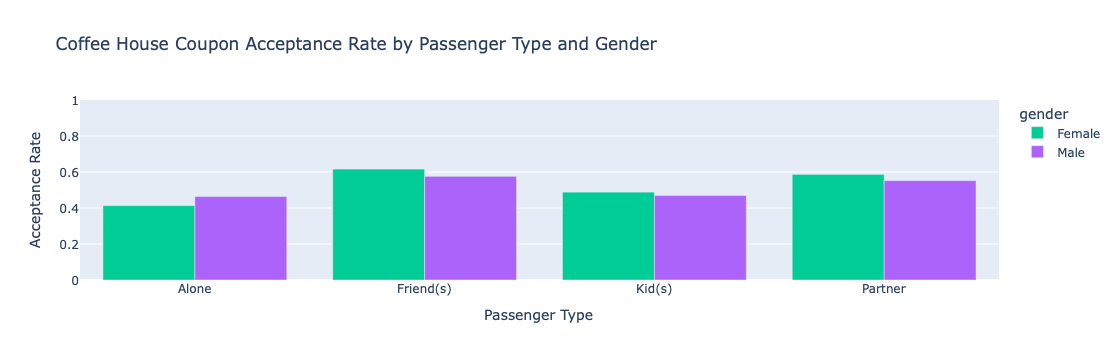


Acceptance rate by passenger type and gender:
   passanger  gender         Y
0      Alone  Female  0.412836
1      Alone    Male  0.463636
2  Friend(s)  Female  0.616129
3  Friend(s)    Male  0.575908
4     Kid(s)  Female  0.488000
5     Kid(s)    Male  0.469136
6    Partner  Female  0.586667
7    Partner    Male  0.551948

Proportion of accepted coffee house coupons: 0.50


In [86]:
coffee_coupons = new_data[new_data['coupon'] == 'Coffee House']
coffee_coupons = coffee_coupons.reset_index(drop=True)
grouped = coffee_coupons.groupby(['passanger', 'gender'])['Y'].mean().reset_index()

fig = px.bar(
    grouped,
    x='passanger',
    y='Y',
    color = 'gender',
    barmode = 'group',
    title='Coffee House Coupon Acceptance Rate by Passenger Type and Gender',
    labels={'Y': 'Acceptance Rate', 'passanger': 'Passenger Type'},
    color_discrete_map=(
        {'male': 'blue', 'female': 'pink'}
    )
)
fig.update_layout(
    yaxis_range=[0, 1],
    xaxis_title='Passenger Type',
    yaxis_title='Acceptance Rate',
    width = 800
)
fig.write_image("images/coffee_house_coupon_acceptance_rate_by_passenger_type_gender.png", width = 900, height = 700, scale = 1) 
fig.show()
print("\nAcceptance rate by passenger type and gender:")
print(grouped)
coffee_proportion_accepted = coffee_coupons['Y'].value_counts(normalize=True)[1]
print(f"\nProportion of accepted coffee house coupons: {coffee_proportion_accepted:.2f}")

The bar chart titled “Coffee House Coupon Acceptance Rate by Passenger Type and Gender” shows how acceptance rates vary based on travel companions and gender. Friendships lead to the highest acceptance, with females at 0.62 and males at 0.57. Companionship with a partner results in 0.59 acceptance for females and 0.55 for males. Individuals traveling with children have a moderate acceptance rate, slightly lower than those with partners or friends. Travelers alone, especially females, have the lowest acceptance rate, at around 0.42, while males are slightly higher at 0.47. Overall, the chart suggests that people are more likely to accept coffee coupons when traveling with others, especially friends or partners, and that females generally show slightly higher acceptance across all passenger types.

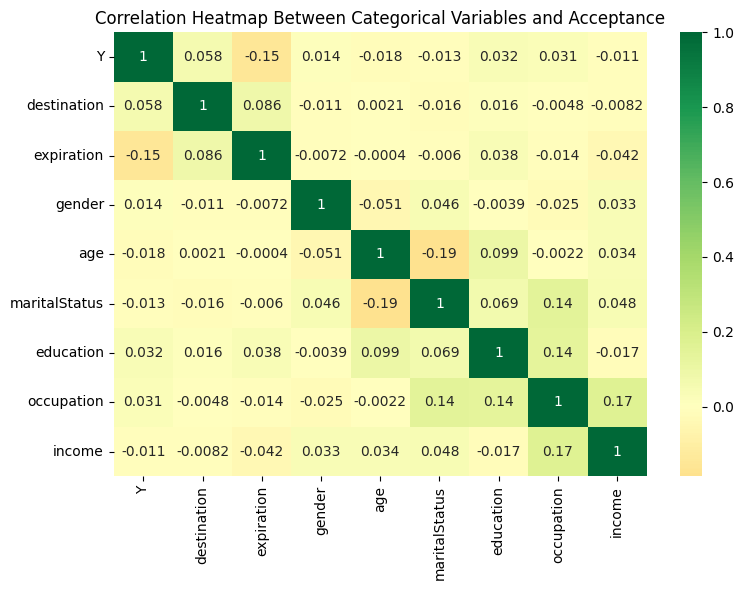

In [85]:
coffee_data = new_data[new_data['coupon'] == 'Coffee House'].copy()

cat_vars = ['Y', 'destination', 'expiration', 'gender', 'age', 
            'maritalStatus', 'education', 'occupation', 'income']

encoded_df = coffee_data[cat_vars].apply(LabelEncoder().fit_transform)

encoded_df['Y'] = coffee_data['Y'].values

corr_matrix = encoded_df.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='RdYlGn', center=0)
plt.title('Correlation Heatmap Between Categorical Variables and Acceptance')
plt.tight_layout()
plt.savefig("images/correlation_heatmap_between_chosen_variables_and_acceptance.png", dpi=500, bbox_inches='tight')  
plt.show()

The heatmap shows the correlation between categorical variables and coupon acceptance (“Y”). Correlation values range from -1 to 1, with 1 indicating a strong positive relationship, -1 a strong negative relationship, and 0 little to no relationship. Expiration has the strongest negative correlation (-0.15), suggesting shorter expiration dates may increase acceptance. Other variables like destination, gender, age, marital status, education, occupation, and income show weak correlations near zero, indicating minimal influence on acceptance. Overall, no single variable strongly impacts acceptance, suggesting multiple factors influence the decision.

**See some other observation below:** 
 - Coffee Coupon Acceptance Rate by Time of Day
 - Age Distribution by Passenger Type for Coffee Coupons

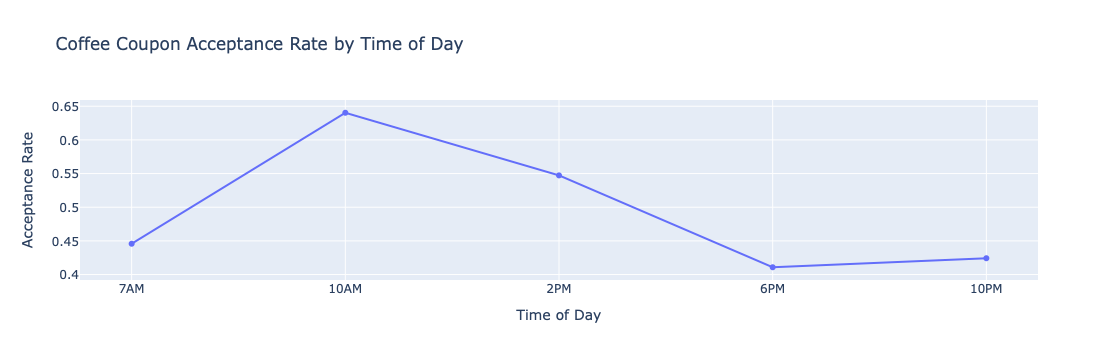

In [84]:
time_order = ['7AM', '10AM', '2PM', '6PM', '10PM']
coffee_data['time'] = pd.Categorical(coffee_data['time'], categories=time_order, ordered=True)

acceptance_by_time = coffee_data.groupby('time', observed=True)['Y'].mean().reset_index()

import plotly.express as px

fig = px.line(
    acceptance_by_time,
    x='time',
    y='Y',
    width=700,
    markers=True,
    title='Coffee Coupon Acceptance Rate by Time of Day',
    labels={'Y': 'Acceptance Rate', 'time': 'Time of Day'}
)
fig.write_image("images/coffee_house_acceptance_rate_by_time_of_day.png", width = 900, height = 700, scale = 1)  # Save as PNG
fig.show()


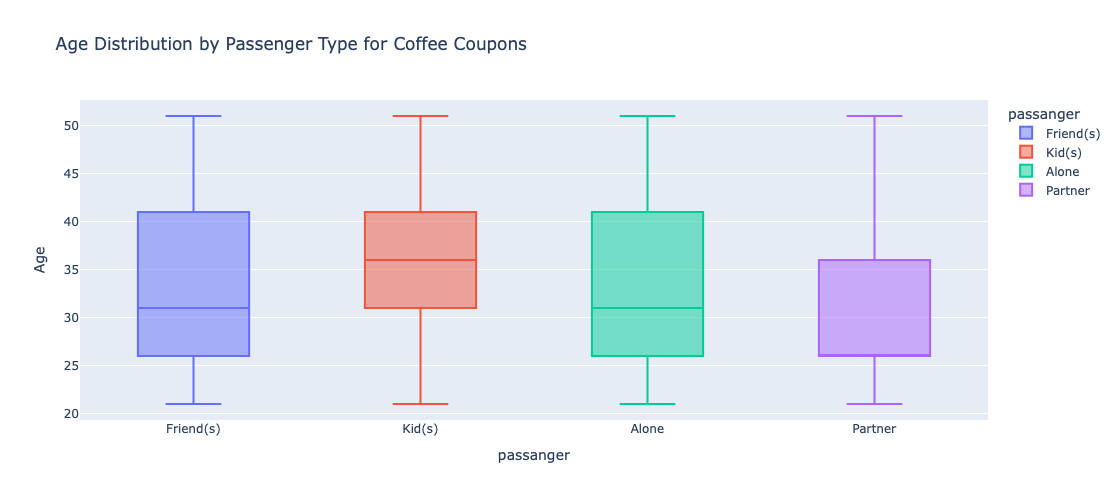

In [83]:
age_mapping = {
    '21': 21,
    '26': 26,
    '31': 31,
    '36': 36,
    '41': 41,
    '46': 46,
    '50plus': 51 
    
}
coffee_data['age_num'] = coffee_data['age'].map(age_mapping)
import plotly.express as px

fig = px.box(
    coffee_data,
    x='passanger',
    y='age_num',
    color='passanger',
    title='Age Distribution by Passenger Type for Coffee Coupons',
    labels={'age_num': 'Age'}
)

fig.update_layout(
    width=700,
    height=500
)
fig.write_image("images/age_distribution_by_passenger_type_for_coffee_coupons.png", width = 900, height = 700, scale = 1)  # Save as PNG
fig.show()